### Analysing heart disease data from kaggle

In [1]:
import pyforest

#### Load dataset

In [2]:
heart_disease_df = pd.read_csv('data/Heart_disease_details.csv')
heart_disease_df.head()

<IPython.core.display.Javascript object>

,Name,Gender,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,...,Cardiac CT,Obesity,Murmur,Chest x-ray,Previous illnesses,Pulmonary function tests,Spirometry,Diagnosis,Medications,Treatment
0,Jane Doe,Female,55,1,1,1,140,90,100,1,...,Shows a 50% blockage in the left anterior desc...,0,1,None,None,None,None,Coronary artery disease (CAD),"Aspirin, metoprolol, atorvastatin","Angioplasty,Coronary artery bypass surgery"
1,Mark Johnson,Male,57,1,1,1,150,80,110,1,...,Shows a 60% blockage in the right coronary artery,0,1,None,None,None,None,Coronary artery disease (CAD),"Aspirin, ramipril, atorvastatin","Angioplasty,Coronary artery bypass surgery"
2,Emily Davis,Female,60,1,1,1,130,85,95,1,...,Shows a 75% blockage in the left anterior desc...,0,1,None,None,None,None,Coronary artery disease (CAD),"Aspirin, lisinopril, rosuvastatin","Angioplasty,Coronary artery bypass surgery"
3,William Thompson,Male,62,1,1,1,145,90,100,1,...,Shows a 80% blockage in the left circumflex co...,0,1,None,None,None,None,Coronary artery disease (CAD),"Aspirin, metoprolol, atorvastatin","Angioplasty,Coronary artery bypass surgery"
4,Ashley Johnson,Female,58,1,1,1,135,80,105,1,...,Shows a 90% blockage in the right coronary artery,0,1,None,None,None,None,Coronary artery disease (CAD),"Aspirin, simvastatin, lisinopril","Angioplasty,Coronary artery bypass surgery"


In [3]:
heart_disease_df.head(2)

,Name,Gender,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,...,Cardiac CT,Obesity,Murmur,Chest x-ray,Previous illnesses,Pulmonary function tests,Spirometry,Diagnosis,Medications,Treatment
0,Jane Doe,Female,55,1,1,1,140,90,100,1,...,Shows a 50% blockage in the left anterior desc...,0,1,None,None,None,None,Coronary artery disease (CAD),"Aspirin, metoprolol, atorvastatin","Angioplasty,Coronary artery bypass surgery"
1,Mark Johnson,Male,57,1,1,1,150,80,110,1,...,Shows a 60% blockage in the right coronary artery,0,1,None,None,None,None,Coronary artery disease (CAD),"Aspirin, ramipril, atorvastatin","Angioplasty,Coronary artery bypass surgery"


In [5]:
heart_disease_df.tail(2)

,Name,Gender,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,...,Cardiac CT,Obesity,Murmur,Chest x-ray,Previous illnesses,Pulmonary function tests,Spirometry,Diagnosis,Medications,Treatment
332,David Johnson,Male,68,1,1,1,140,90,110,0,...,Shows constrictive pericarditis,0,1,None,None,None,None,Constrictive pericarditis,"Ibuprofen, colchicine, prednisone",Pericardiectomy
333,Emily Smith,Female,45,1,0,1,130,80,120,1,...,Shows constrictive pericarditis,0,1,None,None,None,None,Constrictive pericarditis,"Ibuprofen, colchicine, prednisone",Pericardiectomy


In [4]:
heart_disease_df.shape

(334, 49)

In [6]:
heart_disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 49 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Name                                             334 non-null    object
 1   Gender                                           334 non-null    object
 2   Age                                              334 non-null    int64 
 3   Chest pain                                       334 non-null    int64 
 4   Shortness of breath                              334 non-null    int64 
 5   Fatigue                                          334 non-null    int64 
 6   Systolic                                         334 non-null    int64 
 7   Diastolic                                        334 non-null    int64 
 8   Heart rate (bpm)                                 334 non-null    int64 
 9   Lung sounds                                

#### Statistical summary

In [46]:
heart_disease_df.dtypes.value_counts()

int64     36
object    13
dtype: int64

In [7]:
heart_disease_df.describe()

,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,Cholesterol level (mg/dL),LDL level (mg/dL),...,Chills,Joint pain,Alcoholism,Hypertension,Fainting,Dizziness,Smoking,High cholesterol,Obesity,Murmur
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,...,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,50.149701,0.880240,0.826347,0.979042,133.098802,83.203593,101.152695,0.859281,213.637725,136.916168,...,0.173653,0.137725,0.002994,0.553892,0.086826,0.122754,0.350299,0.586826,0.056886,0.458084
std,15.151935,0.325168,0.379379,0.143459,10.040121,6.947282,11.667466,0.348253,26.169645,24.484085,...,0.379379,0.345128,0.054718,0.497833,0.282003,0.328648,0.477779,0.493142,0.231973,0.498987
min,23.000000,0.000000,0.000000,0.000000,110.000000,70.000000,60.000000,0.000000,150.000000,95.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.000000,1.000000,1.000000,130.000000,80.000000,96.250000,1.000000,200.000000,120.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,1.000000,1.000000,1.000000,130.000000,80.000000,100.000000,1.000000,210.000000,130.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.500000,1.000000,1.000000,1.000000,140.000000,90.000000,110.000000,1.000000,230.000000,150.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,100.000000,1.000000,1.000000,1.000000,160.000000,110.000000,120.000000,1.000000,310.000000,240.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
above_40 = heart_disease_df[heart_disease_df['Age']> 40]
above_40.head()

,Name,Gender,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,...,Cardiac CT,Obesity,Murmur,Chest x-ray,Previous illnesses,Pulmonary function tests,Spirometry,Diagnosis,Medications,Treatment
0,Jane Doe,Female,55,1,1,1,140,90,100,1,...,Shows a 50% blockage in the left anterior desc...,0,1,None,None,None,None,Coronary artery disease (CAD),"Aspirin, metoprolol, atorvastatin","Angioplasty,Coronary artery bypass surgery"
1,Mark Johnson,Male,57,1,1,1,150,80,110,1,...,Shows a 60% blockage in the right coronary artery,0,1,None,None,None,None,Coronary artery disease (CAD),"Aspirin, ramipril, atorvastatin","Angioplasty,Coronary artery bypass surgery"
2,Emily Davis,Female,60,1,1,1,130,85,95,1,...,Shows a 75% blockage in the left anterior desc...,0,1,None,None,None,None,Coronary artery disease (CAD),"Aspirin, lisinopril, rosuvastatin","Angioplasty,Coronary artery bypass surgery"
3,William Thompson,Male,62,1,1,1,145,90,100,1,...,Shows a 80% blockage in the left circumflex co...,0,1,None,None,None,None,Coronary artery disease (CAD),"Aspirin, metoprolol, atorvastatin","Angioplasty,Coronary artery bypass surgery"
4,Ashley Johnson,Female,58,1,1,1,135,80,105,1,...,Shows a 90% blockage in the right coronary artery,0,1,None,None,None,None,Coronary artery disease (CAD),"Aspirin, simvastatin, lisinopril","Angioplasty,Coronary artery bypass surgery"


In [10]:
heart_disease_df[["Age", "Drug use"]].head()

,Age,Drug use
0,55,0
1,57,0
2,60,0
3,62,0
4,58,0


In [18]:
young_patients = heart_disease_df.loc[heart_disease_df['Age'] < 30 , 'Name']
young_patients.head()

73     David Parker
84     David Parker
94     David Parker
96      Emily Davis
103     Emily Davis
Name: Name, dtype: object

In [20]:
slim_df = heart_disease_df.iloc[ 20:25, 2:9]
slim_df

,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm)
20,55,1,1,1,130,80,100
21,65,1,1,1,120,80,95
22,60,1,1,1,130,80,100
23,40,0,1,1,130,80,95
24,60,0,1,1,130,80,100


In [25]:
heart_disease_df.groupby('Gender')[['Diastolic', 'Heart rate (bpm)', 'Drug use', 'Alcoholism']].mean()

,Diastolic,Heart rate (bpm),Drug use,Alcoholism
Gender,,,,
Female,81.536145,100.331325,0.066265,0.006024
Male,84.851190,101.964286,0.017857,0.000000


In [29]:
heart_disease_df.pivot(columns='Gender',values='Heart rate (bpm)').head()

Gender,Female,Male
0,100.0,NaN
1,NaN,110.0
2,95.0,NaN
3,NaN,100.0
4,105.0,NaN


#### Techincal summary
###### No field with null value

In [5]:
# heart_disease_df.info()

#### Visualisation of data against age

In [61]:
# heart_disease_df['age'] = heart_disease_df['Age'].astype(int)
# heart_disease_df[["Chest pain", "Drug use"]].plot(x='age', subplots=True, layout=(2,2), figsize=(10,10))
# plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

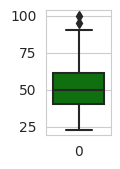

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

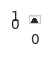

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

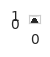

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

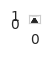

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

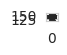

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

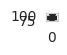

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

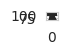

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

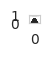

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

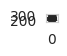

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

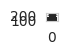

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

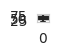

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

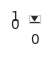

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

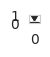

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

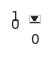

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

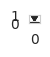

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

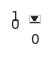

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

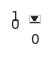

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

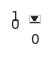

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

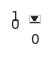

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

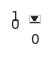

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

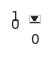

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

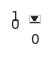

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

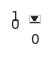

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

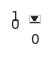

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

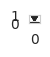

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

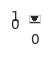

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

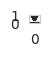

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

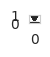

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

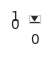

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

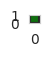

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

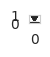

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

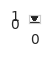

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

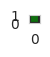

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

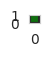

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

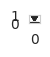

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

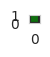

In [64]:
num_of_cols = 36
l = heart_disease_df.corr(numeric_only=True).columns.values
plt.figure(figsize=(num_of_cols, 2*num_of_cols))
for i in range(num_of_cols):
    plt.subplot(num_of_cols + 1, num_of_cols, i+1)
    sns.set_style('whitegrid')
    sns.boxplot(heart_disease_df[l[i]], color='green', orient='v')
#     plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

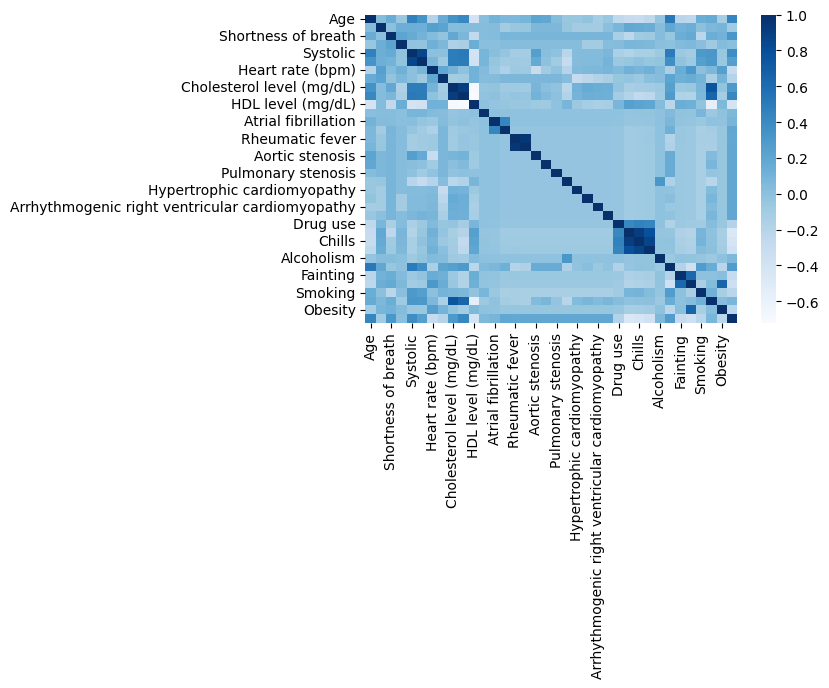

In [42]:
plt.figure(figsize=(6, 4))
sns.heatmap(heart_disease_df.corr(numeric_only=True), cmap='Blues', annot=False)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

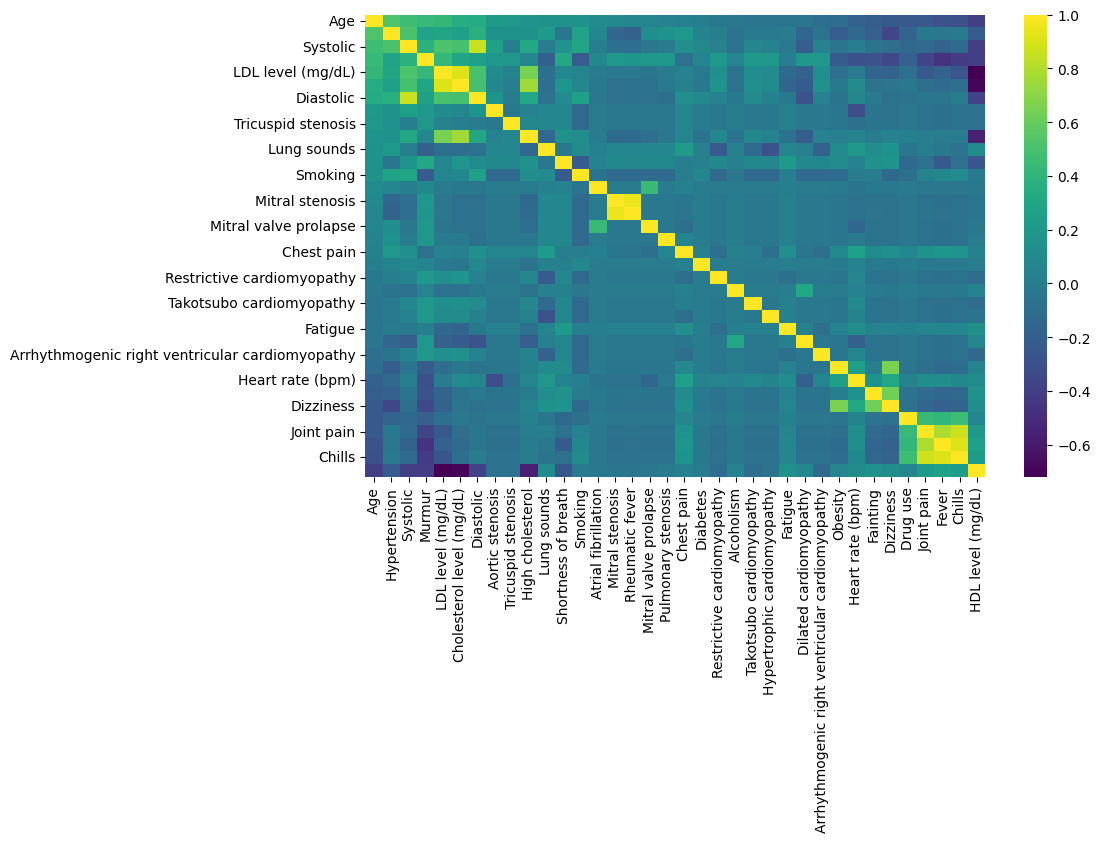

In [53]:
k = 36
cols = heart_disease_df.corr(numeric_only=True).nlargest(k, "Age")["Age"].index
cm = heart_disease_df[cols].corr(numeric_only=True)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=False, cmap = 'viridis')
plt.show()

In [55]:
heart_disease_df.columns.values

array(['Name', 'Gender', 'Age', 'Chest pain', 'Shortness of breath',
       'Fatigue', 'Systolic', 'Diastolic', 'Heart rate (bpm)',
       'Lung sounds', 'Cholesterol level (mg/dL)', 'LDL level (mg/dL)',
       'HDL level (mg/dL)', 'Diabetes', 'Atrial fibrillation',
       'Mitral valve prolapse', 'Rheumatic fever', 'Mitral stenosis',
       'Aortic stenosis', 'Tricuspid stenosis', 'Pulmonary stenosis',
       'Dilated cardiomyopathy', 'Hypertrophic cardiomyopathy',
       'Restrictive cardiomyopathy',
       'Arrhythmogenic right ventricular cardiomyopathy',
       'Takotsubo cardiomyopathy', 'Drug use', 'Fever', 'Chills',
       'Joint pain', 'Alcoholism', 'Hypertension', 'Fainting',
       'Dizziness', 'Smoking', 'High cholesterol', 'Echocardiogram',
       'Blood culture', 'EKG', 'Cardiac CT', 'Obesity', 'Murmur',
       'Chest x-ray', 'Previous illnesses', 'Pulmonary function tests',
       'Spirometry', 'Diagnosis', 'Medications', 'Treatment'],
      dtype=object)